In [1]:
# Импорт библиотек
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, 
                                     Flatten, Dense, 
                                     Dropout, BatchNormalization)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Данные
train_dir = 'Train'
test_dir = 'Test'

# Параметры
img_size = (64, 64)
batch_size = 32

# Аугментация и нормализация для тренировочных данных
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация
    rotation_range=20, # Вращение
    zoom_range=0.2, # Увеличение/уменьшение
    width_shift_range=0.2, # Сдвиг по ширине
    height_shift_range=0.2, # Сдвиг по высоте
    horizontal_flip=True  # Отражение по горизонтали
)

# Нормализация для тестовых данных
test_datagen = ImageDataGenerator(rescale=1./255)

# Генераторы
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 21044 images belonging to 14 classes.
Found 6738 images belonging to 14 classes.


In [2]:
# Архитектура модели
inputs = Input(shape=(64, 64, 3))

# Первый сверточный блок
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Второй сверточный блок
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Третий сверточный блок
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Полносвязные слои
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Выходной слой
outputs = Dense(14, activation='softmax')(x)

# Создание модели
model = Model(inputs, outputs)

# Компиляция
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

# Обучение
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=test_generator
)


Epoch 1/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 293s 438ms/step - accuracy: 0.2127 - loss: 2.6278 - val_accuracy: 0.2627 - val_loss: 2.2170
Epoch 2/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 242s 367ms/step - accuracy: 0.2708 - loss: 2.1057 - val_accuracy: 0.4699 - val_loss: 1.5973
Epoch 3/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 187s 285ms/step - accuracy: 0.4148 - loss: 1.6364 - val_accuracy: 0.2915 - val_loss: 3.6752
Epoch 4/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 193s 293ms/step - accuracy: 0.4390 - loss: 1.4816 - val_accuracy: 0.5334 - val_loss: 1.1512
Epoch 5/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 214s 325ms/step - accuracy: 0.5063 - loss: 1.3125 - val_accuracy: 0.6067 - val_loss: 0.9592
Epoch 6/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 206s 313ms/step - accuracy: 0.6038 - loss: 1.0553 - val_accuracy: 0.6294 - val_loss: 1.0847
Epoch 7/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 184s 279ms/step - accuracy: 0.7069 - loss: 0.7812 - val_accuracy: 0.7253 - val_loss: 0.6839
Epoch 8/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 291s 442ms/step - accuracy: 0.7417 -

211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step
                precision    recall  f1-score   support

   freshapples       0.97      0.89      0.93       791
   freshbanana       0.99      1.00      0.99       892
 freshcucumber       0.00      0.00      0.00       279
     freshokra       0.40      0.99      0.57       370
  freshoranges       0.94      0.91      0.93       388
   freshpatato       0.44      0.01      0.03       270
    freshtamto       0.91      0.91      0.91       255
  rottenapples       0.87      0.92      0.89       988
  rottenbanana       0.97      0.98      0.98       900
rottencucumber       0.44      0.19      0.26       255
    rottenokra       0.00      0.00      0.00       224
 rottenoranges       0.86      0.80      0.83       403
  rottenpatato       0.47      0.97      0.63       370
   rottentamto       0.84      0.89      0.86       353

      accuracy                           0.80      6738
     macro avg       0.65      0.67      0.63      6738
  w

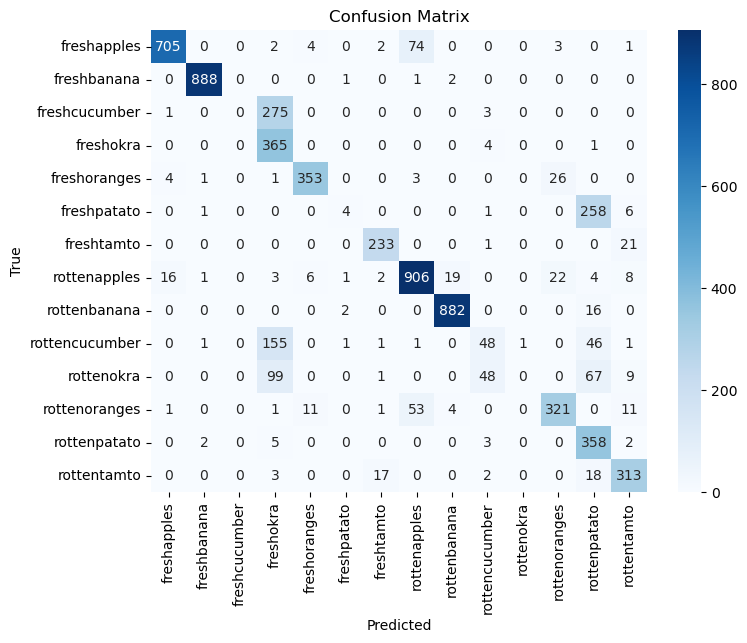

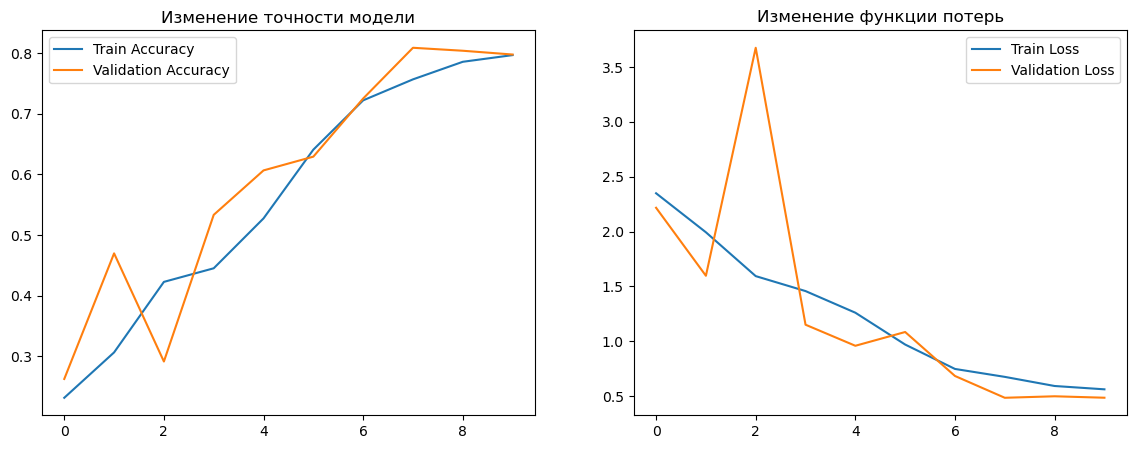

In [3]:
# Предсказания
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Отчёт
print(classification_report(y_true_classes, 
                            y_pred_classes, 
                            target_names=list(test_generator.class_indices.keys())))

# Матрица ошибок
matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Графики точности и потерь
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Изменение точности модели')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Изменение функции потерь')

plt.show()